# Bioimage Model Zoo Core  Example notebook
## https://github.com/bioimage-io/core-bioimage-io-python/blob/main/example/model_usage.ipynb
This notebook shows how to interact with the `bioimageio.core` programmatically to explore, load, use, and export content from the [BioImage Model Zoo](https://bioimage.io).


quick links:
- [Create an input sample for a given model](#create_sample_for_model)

## 0. Activate human readable output error messages and load dependencies

### 0.1. Install necessary dependencies

In [1]:
try:
    import matplotlib
    import torch

    import bioimageio.core
except ImportError:
    %pip install bioimageio.core==0.6.7 torch==2.3.1 matplotlib==3.9.0

### 0.2.Enable pretty_validation_errors

This function displays validation errors in a human readable format.

In [2]:
from bioimageio.spec.pretty_validation_errors import (
    enable_pretty_validation_errors_in_ipynb,
)

enable_pretty_validation_errors_in_ipynb()

### 0.3. Load general dependencies

In [3]:
# Load general dependencies
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread

from bioimageio.spec.utils import download


# Function to display input and prediction output images
def show_images(sample_tensor, prediction_tensor):
    input_array = sample_tensor.members["input0"].data

    # Check for the number of channels to enable display
    input_array = np.squeeze(input_array)
    if len(input_array.shape) > 2:
        input_array = input_array[0]

    output_array = prediction_tensor.members["output0"].data

    # Check for the number of channels to enable display
    output_array = np.squeeze(output_array)
    if len(output_array.shape) > 2:
        output_array = output_array[0]

    plt.figure()
    ax1 = plt.subplot(1, 2, 1)
    ax1.set_title("Input")
    ax1.axis("off")
    plt.imshow(input_array)
    ax2 = plt.subplot(1, 2, 2)
    ax2.set_title("Prediction")
    ax2.axis("off")
    plt.imshow(output_array)
    plt.show()

## 1. Load a model

### 1.1 Inspect available models in the Bioimage Model Zoo

Go to https://bioimage.io to browser available models

### 1.2 Load model from the BioImage Model Zoo

`bioimage.io` resources may be identified via their bioimage.io __ID__, e.g. "affable-shark" or the [__DOI__](https://doi.org/) of their [__Zenodo__](https://zenodo.org/) backup.

Both of these options may be version specific ("affable-shark/1" or a version specific [__Zenodo__](https://zenodo.org/) backup [__DOI__](https://doi.org/)).

Alternatively, any rdf.yaml source, single file or in a .zip, may be loaded by providing its __local path__ or __URL__.

In [71]:
BMZ_MODEL_ID = "kind-seashell"  # "affable-shark"  # "kind-seashell"  # "affable-shark"
BMZ_MODEL_DOI = ""  # "10.5281/zenodo.6287342"
BMZ_MODEL_URL = ""  # "https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/draft/files/rdf.yaml"

`load_description` is a function of the `bioimageio.spec` package, but as it is a sub-package of `bioimageio.core` it can also be called from it by `bioimageio.core.load_description`.

To learn more about the functionalities of the `bioimageio.spec` package, see the [bioimageio.spec package example notebook](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb), also available as a [Google Colab](https://colab.research.google.com/github/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb) notebook.

In [5]:
from bioimageio.core import load_description

# Load the model description
# ------------------------------------------------------------------------------
if BMZ_MODEL_ID != "":
    model = load_description(BMZ_MODEL_ID)
    print(
        f"\nThe model '{model.name}' with ID '{BMZ_MODEL_ID}' has been correctly loaded."
    )
elif BMZ_MODEL_DOI != "":
    model = load_description(BMZ_MODEL_DOI)
    print(
        f"\nThe model '{model.name}' with DOI '{BMZ_MODEL_DOI}' has been correctly loaded."
    )
elif BMZ_MODEL_URL != "":
    model = load_description(BMZ_MODEL_URL)
    print(
        f"\nThe model '{model.name}' with URL '{BMZ_MODEL_URL}' has been correctly loaded."
    )
else:
    print("\nPlease specify a model ID, DOI or URL")

if "draft" in BMZ_MODEL_ID or "draft" in BMZ_MODEL_DOI or "draft" in BMZ_MODEL_URL:
    print(
        f"\nThis is the DRAFT version of '{model.name}'. \nDraft versions have not been reviewed by the Bioimage Model Zoo Team and may contain harmful code. Run with caution."
    )

2024-12-09 12:01:35.457 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading kind-seashell from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/kind-seashell/1/files/rdf.yaml
computing SHA256 of 32ed4caf7ecad2d03e022fdf92af2a61-weights.pt (result: 8863a1e7e3d75b5d82ea07761dc384338cdb6789155e325a4102bbd2585792d8): 100%|██████████| 2607/2607 [00:00<00:00, 3642.40it/s]
computing SHA256 of a3cc4f42f8608d8c21cc31768832e0ea-weights-torchscript.pt (result: b3ffbe1d9d227c53f26cfb01de97710f7f89104d20861c0a57cd36e2d48bb999): 100%|██████████| 2608/2608 [00:00<00:00, 3708.69it/s]


The model 'MitochondriaEMSegmentationBoundaryModel' with ID 'kind-seashell' has been correctly loaded.


### 1.3 Inspect the model metadata

Let's inspect all the model metadata. For a step-by-step inspection refer to [bioimageio.spec package example notebook](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb).

In [72]:
pprint(model)

ModelDescr(name='MitochondriaEMSegmentationBoundaryModel', description='Mitochondria segmentation for electron microscopy.', covers=[RelativePath('cover.png')], id_emoji='🐚', authors=[Author(affiliation=None, email=None, orcid=None, name='Constantin Pape', github_user=None)], attachments=AttachmentsDescr(files=[RelativePath('zero_mean_unit_variance.ijm')]), cite=[CiteEntry(text='training library', doi=None, url='https://doi.org/10.5281/zenodo.5108853'), CiteEntry(text='architecture', doi=None, url='https://doi.org/10.1007/978-3-319-46723-8_49'), CiteEntry(text='segmentation algorithm', doi=None, url='https://doi.org/10.1038/nmeth.4151'), CiteEntry(text='data', doi=None, url='https://doi.org/10.1007/978-3-030-59722-1_7')], config={'_conceptdoi': '10.5281/zenodo.5874841', 'bioimageio': {'nickname': 'kind-seashell', 'nickname_icon': '🐚', 'thumbnails': {'cover.png': 'cover.thumbnail.png'}}, 'deepimagej': {'allow_tiling': True, 'model_keys': None, 'prediction': {'postprocess': [{'spec': Non

: 


 Covers of the model 'MitochondriaEMSegmentationBoundaryModel' are: 


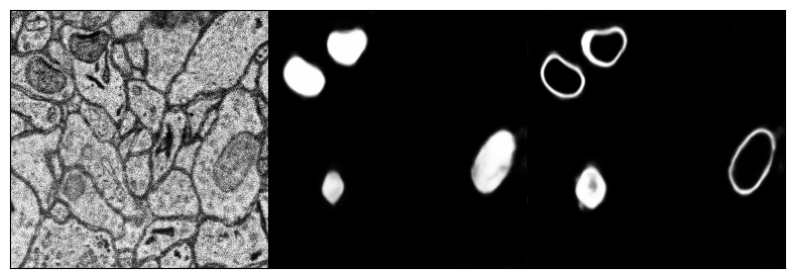

In [7]:
print(f"\n Covers of the model '{model.name}' are: ")
for cover in model.covers:
    cover_data = imread(download(cover).path)
    plt.figure(figsize=(10, 10))
    plt.imshow(cover_data)
    plt.xticks([])
    plt.yticks([])
    plt.show()

## 2. Test the model

The `bioimageio.core.test_model` function can be used to fully test the model.
This is done by running the predicition on the test input(s) and checking that they agree with the test output(s) provided in the model documentation.

This test should be run before using the model to ensure that it works properly.

----

`bioimageio.core.test_model` returns a validation dictionary with 'status'='passed'/'failed' and other detailed information that can be inspected by calling `.display()` on it.

The validation summary will indicate:
- the versions of the `bioimageio.spec` and `bioimageio.core` libraries used to run the validation
- the status of several validation steps
    - ✔️: Success
    - 🔍: information about the validation context
    - ⚠: Warning
    - ❌: Error

In [8]:
from bioimageio.core import test_model

test_summary = test_model(model)
test_summary.display()

2024-12-09 12:02:03.447 | INFO     | bioimageio.core._resource_tests:_test_model_inference:147 - starting 'Reproduce test outputs from test inputs (pytorch_state_dict)'
/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/model_adapters/_pytorch_model_adapter.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_


|        ❌        |                                bioimageio validation failed                                |
|       ---       |                                            ---                                             |
| source          | https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/kind-seashell/1/files/rdf.yaml |
| format version  | model 0.4.10                                                                               |
| bioimageio.spec | 0.5.3.3                                                                                    |
| bioimageio.core | 0.6.10                                                                                     |

|  ❓  |                  location                  |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       detail                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| --- |                    ---                     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ---                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ✔️  |                                            | initialized ModelDescr to describe model 0.4.10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
|     |                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ✔️  |                                            | bioimageio.spec format validation model 0.4.10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| 🔍   | context.perform_io_checks                  | True                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| 🔍   | context.root                               | https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/kind-seashell/1/files                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 🔍   | context.known_files.weights.pt             | 8863a1e7e3d75b5d82ea07761dc384338cdb6789155e325a4102bbd2585792d8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| 🔍   | context.known_files.weights-torchscript.pt | b3ffbe1d9d227c53f26cfb01de97710f7f89104d20861c0a57cd36e2d48bb999                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| 🔍   | context.warning_level                      | error                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|     |                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ✔️  |                                            | Has expected resource type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|     |                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ❌   |                                            | Reproduce test outputs from test inputs (pytorch_state_dict)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| ❌   | `weights.pytorch_state_dict`               | "batch_norm_stats_cuda" not implemented for 'Byte'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|     |                                            | [_resource_tests.py](_resource_tests.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/_resource_tests.py"), line 164, in _test_model_inference<br>`    results = prediction_pipeline.predict_sample_without_blocking(inputs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|     |                                            | [_prediction_pipeline.py](_prediction_pipeline.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/_prediction_pipeline.py"), line 160, in predict_sample_without_blocking<br>`    self._adapter.forward(`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|     |                                            | [_pytorch_model_adapter.py](_pytorch_model_adapter.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/model_adapters/_pytorch_model_adapter.py"), line 71, in forward<br>`    result = self._network(  # pyright: ignore[reportUnknownVariableType]`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1553, in _wrapped_call_impl<br>`    return self._call_impl(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1562, in _call_impl<br>`    return forward_call(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|     |                                            | [41e43764806bd46d060d7a00843d455b-unet.py](41e43764806bd46d060d7a00843d455b-unet.py "/home/ackermand@hhmi.org/.cache/bioimageio/41e43764806bd46d060d7a00843d455b-unet.py"), line 206, in forward<br>`    return self._apply_default(x)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|     |                                            | [41e43764806bd46d060d7a00843d455b-unet.py](41e43764806bd46d060d7a00843d455b-unet.py "/home/ackermand@hhmi.org/.cache/bioimageio/41e43764806bd46d060d7a00843d455b-unet.py"), line 169, in _apply_default<br>`    x, encoder_out = self.encoder(x)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1553, in _wrapped_call_impl<br>`    return self._call_impl(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1562, in _call_impl<br>`    return forward_call(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|     |                                            | [41e43764806bd46d060d7a00843d455b-unet.py](41e43764806bd46d060d7a00843d455b-unet.py "/home/ackermand@hhmi.org/.cache/bioimageio/41e43764806bd46d060d7a00843d455b-unet.py"), line 265, in forward<br>`    x = block(x)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1553, in _wrapped_call_impl<br>`    return self._call_impl(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1562, in _call_impl<br>`    return forward_call(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|     |                                            | [41e43764806bd46d060d7a00843d455b-unet.py](41e43764806bd46d060d7a00843d455b-unet.py "/home/ackermand@hhmi.org/.cache/bioimageio/41e43764806bd46d060d7a00843d455b-unet.py"), line 384, in forward<br>`    return self.block(x)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1553, in _wrapped_call_impl<br>`    return self._call_impl(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1562, in _call_impl<br>`    return forward_call(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|     |                                            | [container.py](container.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/container.py"), line 219, in forward<br>`    input = module(input)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1553, in _wrapped_call_impl<br>`    return self._call_impl(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
|     |                                            | [module.py](module.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/module.py"), line 1562, in _call_impl<br>`    return forward_call(*args, **kwargs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|     |                                            | [instancenorm.py](instancenorm.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/instancenorm.py"), line 95, in forward<br>`    return self._apply_instance_norm(input)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|     |                                            | [instancenorm.py](instancenorm.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/modules/instancenorm.py"), line 37, in _apply_instance_norm<br>`    return F.instance_norm(`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|     |                                            | [functional.py](functional.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/torch/nn/functional.py"), line 2556, in instance_norm<br>`    return torch.instance_norm(`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
|     |                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ❌   |                                            | Reproduce test outputs from test inputs (torchscript)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| ❌   | `weights.torchscript`                      | The following operation failed in the TorchScript interpreter.
Traceback of TorchScript, serialized code (most recent call last):
  File "code/__torch__/module_from_source/unet.py", line 18, in forward
    base = self.base
    encoder = self.encoder
    _0, _1, _2, _3, _4, _5, _6, _7, _8, _9, _10, _11, _12, _13, _14, _15, _16, _17, _18, _19, _20, _21, _22, _23, _24, _25, _26, _27, _28, _29, _30, _31, _32, _33, _34, _35, _36, _37, _38, _39, _40, _41, _42, _43, _44, = (encoder).forward(x, )
                                                                                                                                                                                                                              ~~~~~~~~~~~~~~~~ <--- HERE
    _45 = (decoder).forward((base).forward(_0, ), _1, _2, _3, _4, _5, _6, _7, _8, _9, _10, _11, _12, _13, _14, _15, _16, _17, _18, _19, _20, _21, _22, _23, _24, _25, _26, _27, _28, _29, _30, _31, _32, _33, _34, _35, _36, _37, _38, _39, _40, _41, _42, _43, _44, )
    _46 = (final_activation).forward((out_conv).forward(_45, ), )
  File "code/__torch__/module_from_source/unet.py", line 47, in forward
    blocks2 = self.blocks
    _00 = getattr(blocks2, "0")
    _47 = (_00).forward(x, )
           ~~~~~~~~~~~~ <--- HERE
    _48 = (_10).forward((_0).forward(_47, ), )
    _49 = (_20).forward((_1).forward(_48, ), )
  File "code/__torch__/module_from_source/unet.py", line 62, in forward
    x: Tensor) -> Tensor:
    block = self.block
    return (block).forward(x, )
            ~~~~~~~~~~~~~~ <--- HERE
class Decoder(Module):
  __parameters__ = []
  File "code/__torch__/torch/nn/modules/container.py", line 29, in forward
    _1 = getattr(self, "1")
    _0 = getattr(self, "0")
    _6 = (_2).forward((_1).forward((_0).forward(x, ), ), )
                                    ~~~~~~~~~~~ <--- HERE
    _7 = (_5).forward((_4).forward((_3).forward(_6, ), ), )
    return _7
  File "code/__torch__/torch/nn/modules/instancenorm.py", line 8, in forward
  def forward(self: __torch__.torch.nn.modules.instancenorm.InstanceNorm3d,
    x: Tensor) -> Tensor:
    input = torch.instance_norm(x, None, None, None, None, True, 0.10000000000000001, 1.0000000000000001e-05, True)
            ~~~~~~~~~~~~~~~~~~~ <--- HERE
    return input

Traceback of TorchScript, original code (most recent call last):
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/functional.py(2327): instance_norm
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/instancenorm.py(57): forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1090): _slow_forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1102): _call_impl
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/container.py(141): forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1090): _slow_forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1102): _call_impl
/g/kreshuk/pape/Work/my_projects/torch-em/experiments/mito-em/modelzoo/boundary_model/unet.py(384): forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1090): _slow_forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1102): _call_impl
/g/kreshuk/pape/Work/my_projects/torch-em/experiments/mito-em/modelzoo/boundary_model/unet.py(265): forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1090): _slow_forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1102): _call_impl
/g/kreshuk/pape/Work/my_projects/torch-em/experiments/mito-em/modelzoo/boundary_model/unet.py(169): _apply_default
/g/kreshuk/pape/Work/my_projects/torch-em/experiments/mito-em/modelzoo/boundary_model/unet.py(206): forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1090): _slow_forward
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/nn/modules/module.py(1102): _call_impl
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/jit/_trace.py(958): trace_module
/home/pape/Work/software/conda/miniconda3/envs/torch10/lib/python3.9/site-packages/torch/jit/_trace.py(741): trace
/g/kreshuk/pape/Work/bioimageio/python-bioimage-io/bioimageio/core/weight_converter/torch/torchscript.py(98): convert_weights_to_torchscript
/g/kreshuk/pape/Work/my_projects/torch-em/torch_em/util/modelzoo.py(700): _convert_impl
/g/kreshuk/pape/Work/my_projects/torch-em/torch_em/util/modelzoo.py(722): convert_to_torchscript
/g/kreshuk/pape/Work/my_projects/torch-em/torch_em/util/modelzoo.py(741): add_weight_formats
/g/kreshuk/pape/Work/my_projects/torch-em/experiments/mito-em/export_bioimageio_model.py(132): export_to_bioimageio
/g/kreshuk/pape/Work/my_projects/torch-em/experiments/mito-em/export_bioimageio_model.py(138): <module>
RuntimeError: "batch_norm_stats_cuda" not implemented for 'Byte'
 |
|     |                                            | [_resource_tests.py](_resource_tests.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/_resource_tests.py"), line 164, in _test_model_inference<br>`    results = prediction_pipeline.predict_sample_without_blocking(inputs)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
|     |                                            | [_prediction_pipeline.py](_prediction_pipeline.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/_prediction_pipeline.py"), line 160, in predict_sample_without_blocking<br>`    self._adapter.forward(`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|     |                                            | [_torchscript_model_adapter.py](_torchscript_model_adapter.py "/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/model_adapters/_torchscript_model_adapter.py"), line 70, in forward<br>`    ] = self._model.forward(*torch_tensor)`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|     |                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |


## 3. Running a prediction

`bioimageio.core` implements the functionality to run a prediction with models described in the `bioimage.io` format.

This includes functions to run predictions on `numpy.ndarray`/`xarray.DataArray` as input and convenience functions to run predictions for images stored on disc.

### 3.1. Load the test image and convert into a tensor

In [9]:
from bioimageio.spec.model import v0_5
from bioimageio.spec.utils import load_array

assert isinstance(model, v0_5.ModelDescr)
input_image = load_array(model.inputs[0].test_tensor)
print(f"array shape: {input_image.shape}")

AssertionError: 

Create a `Tensor` (light wrapper around an `xarray.DataArray`) from the test input image. 

`bioimageio.core.Tensors/xarray.DataArrays` are like numpy arrays, but they have annotated axes.

The axes are used to validate that the axes of the input image match the axes expected by the model.

In [10]:
from bioimageio.core import Tensor

# create random input tensor


input_image = np.random.rand(1, 1, 64, 64, 64).astype(np.float32)
test_input_tensor = Tensor.from_numpy(
    input_image, dims=["batch", "channel", "z", "y", "x"]
)  # [a for a in model.inputs[0].axes])

# print the axis annotations ('dims') and the shape of the input array
print(f"tensor shape: {test_input_tensor.tagged_shape}")

tensor shape: Frozen({'batch': 1, 'channel': 1, 'z': 64, 'y': 64, 'x': 64})


In [11]:
from bioimageio.core.axis import Axis, AxisId, AxisInfo, AxisLike, PerAxis
from bioimageio.core.tensor import _get_array_view

print(isinstance(model.inputs[0].axes, (str, Axis, v0_5.AxisBase)))
axis_infos = [AxisInfo.create(a) for a in [model.inputs[0].axes]]
print(axis_infos)
original_shape = tuple(input_image.shape)
successful_view = _get_array_view(input_image, axis_infos)
print(successful_view)

True
[AxisInfo(id='bczyx', type='index', maybe_singleton=True)]
None


A collection of tensors is called a `Sample`.

In the case of the `affable-shark` model it only has one input, but for models with multiple inputs a `Sample` includes a tensor for each input.

In [31]:
from bioimageio.core import Sample
from bioimageio.core.stat_measures import Stat

sample = Sample(
    members={"input0": test_input_tensor}, stat=Stat, id="sample-from-numpy"
)

sample

Sample(members={'input0': <bioimageio.core.tensor.Tensor object at 0x7fa4e7b99690>}, stat=typing.Dict[typing.Annotated[typing.Union[typing.Annotated[typing.Union[bioimageio.core.stat_measures.SampleMean, bioimageio.core.stat_measures.SampleStd, bioimageio.core.stat_measures.SampleVar, bioimageio.core.stat_measures.SampleQuantile], Discriminator(discriminator='name', custom_error_type=None, custom_error_message=None, custom_error_context=None)], typing.Annotated[typing.Union[bioimageio.core.stat_measures.DatasetMean, bioimageio.core.stat_measures.DatasetStd, bioimageio.core.stat_measures.DatasetVar, bioimageio.core.stat_measures.DatasetPercentile], Discriminator(discriminator='name', custom_error_type=None, custom_error_message=None, custom_error_context=None)]], Discriminator(discriminator='scope', custom_error_type=None, custom_error_message=None, custom_error_context=None)], typing.Union[float, typing.Annotated[bioimageio.core.tensor.Tensor, BeforeValidator(func=<function tensor_cust

In [48]:
Stat

typing.Dict[typing.Annotated[typing.Union[typing.Annotated[typing.Union[bioimageio.core.stat_measures.SampleMean, bioimageio.core.stat_measures.SampleStd, bioimageio.core.stat_measures.SampleVar, bioimageio.core.stat_measures.SampleQuantile], Discriminator(discriminator='name', custom_error_type=None, custom_error_message=None, custom_error_context=None)], typing.Annotated[typing.Union[bioimageio.core.stat_measures.DatasetMean, bioimageio.core.stat_measures.DatasetStd, bioimageio.core.stat_measures.DatasetVar, bioimageio.core.stat_measures.DatasetPercentile], Discriminator(discriminator='name', custom_error_type=None, custom_error_message=None, custom_error_context=None)]], Discriminator(discriminator='scope', custom_error_type=None, custom_error_message=None, custom_error_context=None)], typing.Union[float, typing.Annotated[bioimageio.core.tensor.Tensor, BeforeValidator(func=<function tensor_custom_before_validator at 0x7fa4e7c35ea0>, json_schema_input_type=PydanticUndefined), PlainSe

`bioimageio.core` provides the helper function `create_sample_for_model` to automatically create the `Sample` for the given model.
<a id='create_sample_for_model'></a>

In [13]:
model.inputs

[InputTensorDescr(name='input0', description='', axes='bczyx', data_range=(0.0, 255.0), data_type='uint8', shape=ParameterizedInputShape(min=[1, 1, 8, 32, 32], step=[0, 0, 4, 16, 16]), preprocessing=[ZeroMeanUnitVarianceDescr(name='zero_mean_unit_variance', kwargs=ZeroMeanUnitVarianceKwargs(mode='per_sample', axes='czyx', mean=None, std=None, eps=1e-06))])]

In [29]:
from bioimageio.core.digest_spec import create_sample_for_model
from bioimageio.spec.utils import download
from pathlib import Path

# input_paths = {
#     idx: download(ipt.test_tensor).path for idx, ipt in enumerate(model.inputs)
# }
# print(f"input paths: {input_paths}")
# assert isinstance(model, v0_5.ModelDescr)
sample = create_sample_for_model(
    model=model, inputs={"input0": Path("./sample")}, sample_id="my_demo_sample"
)

sample

FileNotFoundError: No such file: '/groups/scicompsoft/home/ackermand/Programming/cellmap-flow/sample'

In [51]:
from bioimageio.core.weight_converter.torch._torchscript import (
    convert_weights_to_torchscript,
)

convert_weights_to_torchscript(model, "./tmp.pt")

/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/weight_converter/torch/_utils.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues

TorchscriptWeightsDescr(source=RelativePath('tmp.pt'), sha256='7e63e3c06d68c239cd9e45d6ec3876c4a20499e19380f3f5af4003a5f194c4bb', authors=None, parent='pytorch_state_dict', pytorch_version=Version(root='2.4.1+cu121'))

In [52]:
m = torch.load("./tmp.pt")

/tmp/ipykernel_84823/796050530.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m = torch.load("./tmp.pt")
/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer

RuntimeError: 
Unknown type name '__torch__':
__torch__.41e43764806bd46d060d7a00843d455b-unet.___torch_mangle_266.AnisotropicUNet
~~~~~~~~~ <--- HERE


In [36]:
for ipt in model.inputs:
    print(ipt)

name='input0' description='' axes='bczyx' data_range=(0.0, 255.0) data_type='uint8' shape=ParameterizedInputShape(min=[1, 1, 8, 32, 32], step=[0, 0, 4, 16, 16]) preprocessing=[ZeroMeanUnitVarianceDescr(name='zero_mean_unit_variance', kwargs=ZeroMeanUnitVarianceKwargs(mode='per_sample', axes='czyx', mean=None, std=None, eps=1e-06))]


There is also  a helper function `get_test_inputs` to directly import the test input sample for a given model.

In [70]:
from bioimageio.core.digest_spec import get_test_inputs

test_sample = get_test_inputs(model)

test_sample = test_input_tensor

### 3.2. Create a prediciton pipeline

The `prediction_pipeline` function is used to run a prediction with a given model.

It applies the __pre-processing__, if indicated in the model rdf.yaml, runs __inference__ with the model and applies the __post-processing__, again if specified in the model rdf.yaml.

The `devices` argument can be used to specify which device(s), CPU, a single GPU, or multiple GPUs (not implemented yet), to use for inference with the model.

The default is `devices=None`, this will use a __GPU__ if available, otherwise it uses the __CPU__.


The `weight_format` argument can be used to specify which of the model's available weight formats to use.

The deafult is `weight_format=None`, this will use the weight format with highest priority (as defined by bioimageio.core).



In [16]:
from bioimageio.core import create_prediction_pipeline

devices = None
weight_format = None

prediction_pipeline = create_prediction_pipeline(
    model, devices=devices, weight_format=weight_format
)

/groups/scicompsoft/home/ackermand/miniconda3/envs/neuroglancer_interactive_inference/lib/python3.10/site-packages/bioimageio/core/model_adapters/_pytorch_model_adapter.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for an

Use the new prediction pipeline to run a prediction for the previously loaded test image.

The prediction pipeline returns a `Sample` object, which will be displayed.

In [24]:
prediction: Sample = prediction_pipeline.predict_sample_without_blocking(
    sample, skip_preprocessing=True
)

# show the prediction result
show_images(sample, prediction[:,:,0])

TypeError: 'Sample' object is not subscriptable

In [25]:
prediction

Sample(members={'output0': <bioimageio.core.tensor.Tensor object at 0x7fa4de4f74c0>}, stat=typing.Dict[typing.Annotated[typing.Union[typing.Annotated[typing.Union[bioimageio.core.stat_measures.SampleMean, bioimageio.core.stat_measures.SampleStd, bioimageio.core.stat_measures.SampleVar, bioimageio.core.stat_measures.SampleQuantile], Discriminator(discriminator='name', custom_error_type=None, custom_error_message=None, custom_error_context=None)], typing.Annotated[typing.Union[bioimageio.core.stat_measures.DatasetMean, bioimageio.core.stat_measures.DatasetStd, bioimageio.core.stat_measures.DatasetVar, bioimageio.core.stat_measures.DatasetPercentile], Discriminator(discriminator='name', custom_error_type=None, custom_error_message=None, custom_error_context=None)]], Discriminator(discriminator='scope', custom_error_type=None, custom_error_message=None, custom_error_context=None)], typing.Union[float, typing.Annotated[bioimageio.core.tensor.Tensor, BeforeValidator(func=<function tensor_cus

### 3.3. Prediction without a PredicitionPipeline

`bioimageio.core` has two convenience functions `predict` and `predict_many` which allow the prediction of images without creating a `PredictionPipeline`.

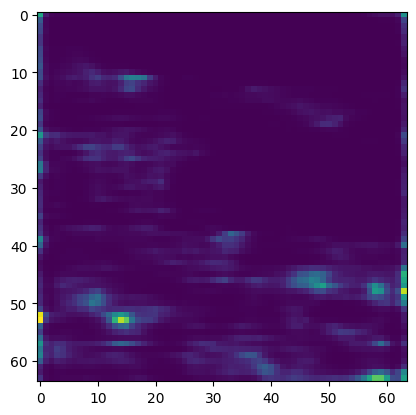

In [69]:
from bioimageio.core import predict  # , predict_many

# predict_many(model=model, inputs=[sample])

prediction: Sample = predict(model=model, inputs=sample, skip_preprocessing=True)

# show the prediction result
from matplotlib import pyplot as plt
plt.imshow(sample.members["input0"].data[0,0,:, :, 0])
plt.imshow(prediction.members["output0"].data[0,0,:, :, 50])



In [66]:
prediction.members["output0"].data

<xarray.DataArray (b: 1, c: 2, z: 64, y: 64, x: 64)>
array([[[[[5.78465275e-02, 1.83177926e-02, 8.73498153e-03, ...,
           2.23818813e-02, 3.18318345e-02, 9.20346603e-02],
          [2.60681063e-02, 6.23327354e-03, 2.12742039e-03, ...,
           4.23069764e-03, 6.71973266e-03, 3.75067331e-02],
          [1.65076032e-02, 3.13621154e-03, 9.31608840e-04, ...,
           1.15745503e-03, 2.75956257e-03, 1.91661213e-02],
          ...,
          [3.08747664e-02, 7.02835852e-03, 3.87992361e-03, ...,
           2.47250660e-03, 4.85078106e-03, 2.77572777e-02],
          [4.47169095e-02, 1.19956238e-02, 6.14909781e-03, ...,
           5.06136706e-03, 8.53956956e-03, 4.21990417e-02],
          [1.02385841e-01, 4.50657569e-02, 2.89974473e-02, ...,
           2.43303031e-02, 3.55578847e-02, 9.81519371e-02]],

         [[3.51120867e-02, 1.08323321e-02, 3.79691157e-03, ...,
           9.56484117e-03, 1.64317302e-02, 5.72735295e-02],
          [1.45390974e-02, 3.32538178e-03, 6.56140153e-04, ...,
           8.55901511e-04, 1.95077364e-03, 1.68616008e-02],
          [6.81214314e-03, 9.29961563e-04, 1.70897867e-04, ...,
           1.57358678e-04, 4.70000261e-04, 6.14738464e-03],
...
           1.36238402e-02, 2.01797467e-02, 3.77821401e-02],
          [3.34465690e-02, 1.52920000e-02, 5.17293764e-03, ...,
           4.01199870e-02, 6.76078051e-02, 8.14225003e-02],
          [6.34169057e-02, 2.94965692e-02, 1.38035547e-02, ...,
           8.71705636e-02, 1.20826297e-01, 1.38837799e-01]],

         [[1.25333473e-01, 7.32293651e-02, 5.29294871e-02, ...,
           2.58297138e-02, 3.74984033e-02, 7.88442194e-02],
          [7.56952465e-02, 3.97261605e-02, 2.27320828e-02, ...,
           8.73928424e-03, 1.48451449e-02, 3.59712578e-02],
          [5.06185740e-02, 1.98340733e-02, 1.05223218e-02, ...,
           4.55812318e-03, 7.44446088e-03, 2.24757511e-02],
          ...,
          [1.16099296e-02, 1.61486701e-03, 6.26578345e-04, ...,
           1.57506038e-02, 1.49976695e-02, 3.42863873e-02],
          [2.17067022e-02, 4.45978018e-03, 1.62366172e-03, ...,
           2.12201681e-02, 1.95296425e-02, 3.91108394e-02],
          [6.27112314e-02, 2.22297758e-02, 1.10205533e-02, ...,
           4.61575016e-02, 4.53891978e-02, 8.48589614e-02]]]]],
      dtype=float32)
Dimensions without coordinates: b, c, z, y, x

### 3.3. Recover input and output tensors as numpy arrays

This example code shows how to recover the image information from the input and output tensors as numpy arrays.

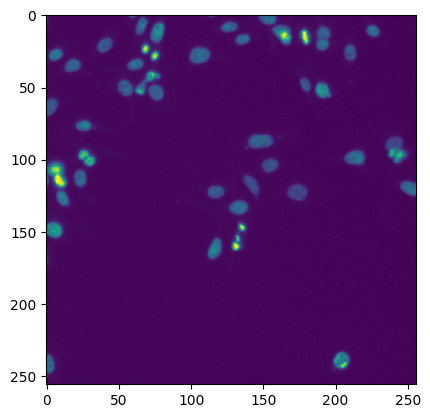

In [17]:
np_input_list = []
np_output_list = []

# iterate over the number of tensors inside the input sample
for ipt in range(len(sample.members.keys())):
    input_array = sample.members[f"input{ipt}"].data

    # Check for the number of channels to enable display
    input_array = np.squeeze(input_array)
    if len(input_array.shape) > 2:
        input_array = input_array[0]

    np_input_list.append(input_array)


# iterate over the number of tensors inside the output prediction
for out in range(len(prediction.members.keys())):
    output_array = prediction.members[f"output{ipt}"].data

    # Check for the number of channels to enable display
    output_array = np.squeeze(output_array)
    if len(output_array.shape) > 2:
        output_array = output_array[0]

    np_output_list.append(output_array)

plt.imshow(np_input_list[0])